**Seeding for Reproducibility**

In [ ]:
# set seeds for reproducibility

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the Dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

**Data Curation**

Upload the Kaggle.json file

In [ ]:
!pip install kaggle

Create a dictionary to store credentials

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
#setup Kaggle API key as Environment Variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:54<00:00, 43.9MB/s]
100% 2.04G/2.04G [00:54<00:00, 39.9MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip","r")as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'color', 'segmented']
38
['Pepper,_bell___healthy', 'Apple___healthy', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___healthy', 'Orange___Haunglongbing_(Citrus_greening)']
38
['Pepper,_bell___healthy', 'Apple___healthy', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___healthy', 'Orange___Haunglongbing_(Citrus_greening)']
38
['Pepper,_bell___healthy', 'Apple___healthy', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___healthy', 'Orange___Haunglongbing_(Citrus_greening)']


**Number of classes = 38**

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Apple___healthy")))
print(os.listdir("plantvillage dataset/color/Apple___healthy")[:5])

1645
['6627c6e7-9d4f-41a7-9d86-ad04cfe2841a___RS_HL 7442.JPG', 'f0194580-8ee6-4149-a63d-7935bc29c09e___RS_HL 7761.JPG', 'e10f9ab3-4775-4947-920a-d272329ae225___RS_HL 7946.JPG', '1d7c71d2-fac0-4ee6-8def-765282cb744c___RS_HL 5758.JPG', 'bd910a05-42d0-4e01-9d88-0c8577ccdbe2___RS_HL 7396.JPG']


**Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___healthy/6627c6e7-9d4f-41a7-9d86-ad04cfe2841a___RS_HL 7442.JPG'

# Read the Image
img = mpimg.imread(image_path)

print(img.shape)

(256, 256, 3)


In [ ]:
# Image matrix
print(img)

[[[168 160 175]
  [143 135 150]
  [146 138 153]
  ...
  [136 122 137]
  [144 130 145]
  [136 122 137]]

 [[144 136 151]
  [181 173 188]
  [165 157 172]
  ...
  [148 134 149]
  [160 146 161]
  [148 134 149]]

 [[162 154 169]
  [169 161 176]
  [130 122 137]
  ...
  [150 136 151]
  [161 147 162]
  [157 143 158]]

 ...

 [[210 207 218]
  [216 213 224]
  [221 218 229]
  ...
  [217 213 227]
  [213 209 223]
  [211 207 221]]

 [[209 206 217]
  [211 208 219]
  [213 210 221]
  ...
  [216 212 226]
  [215 211 225]
  [214 210 224]]

 [[211 208 219]
  [208 205 216]
  [207 204 215]
  ...
  [216 212 226]
  [217 213 227]
  [217 213 227]]]


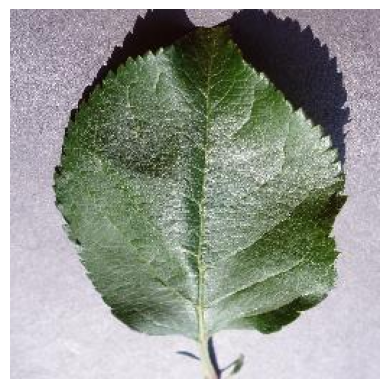

In [ ]:
# Display the Image

plt.imshow(img)
plt.axis('off') # Turn off axis numbers
plt.show()

In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2 #Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = ( img_size,img_size ),
    batch_size = batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Networks**

In [ ]:
#Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model Training**

In [ ]:
\41111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size, # Number of steps per epoch
    epochs = 5, # Number of epochs
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size # Validation Steps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 99ms/step - accuracy: 0.6035 - loss: 1.8672 - val_accuracy: 0.8320 - val_loss: 0.5328
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.0884
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 144s 74ms/step - accuracy: 0.9170 - loss: 0.2599 - val_accuracy: 0.8692 - val_loss: 0.4152
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.5497e-05
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 99s 73ms/step - accuracy: 0.9661 - loss: 0.1033 - val_accuracy: 0.8796 - val_loss: 0.4437


In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8835 - loss: 0.4389
Validation Accuracy: 87.96%


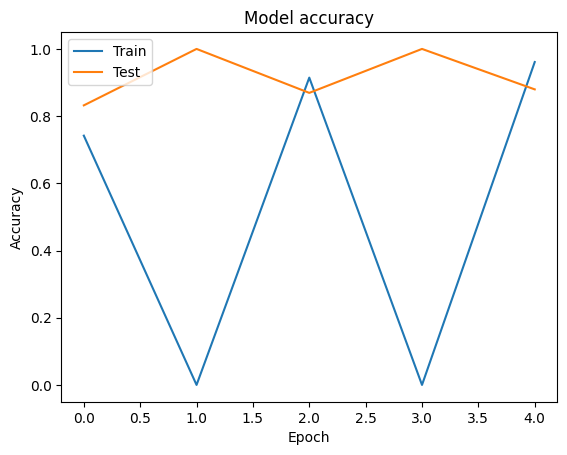

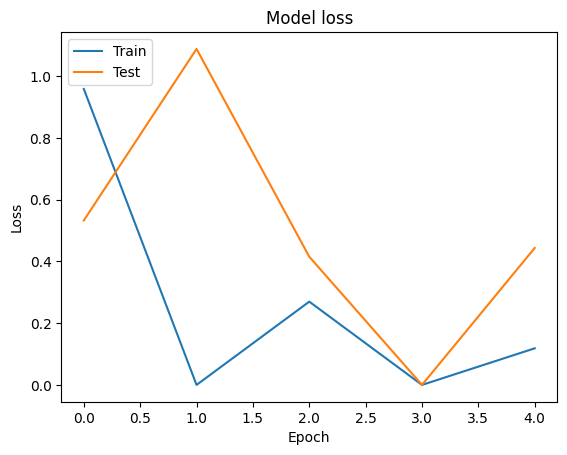

In [ ]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc ='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc ='upper left')
plt.show()

In [ ]:
# Function to load and preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224,224)):
  # Load the Image
  img = Image.open(image_path)
  # Resize the Image
  img = img.resize(target_size)
  # Convert the image to a numpy array
  img_array = np.array(img)
  # Add Batch dimension
  img_array = np.expand_dims(img_array,axis=0)
  # Scale the image values to [0,1]
  img_array = img_array.astype('float32')/255.
  return img_array

# Function to predict thye class of an Image
def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
# Creating a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# Saving the class indices as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# EXAMPLE USAGE

image_path = '/content/02186b4f-a9e1-4d19-ae3d-6cfb0f4b106a___JR_FrgE.S 2828.jpg'
# image_path = '/content/test_blueberry_healthy.jpg'
# image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted Class Name Apple___Black_rot


**Save the model to google drive or local**

In [ ]:
model.save('drive/MyDrive/Colab Notebooks/Plant Disease Prediction - CNN - Image Classifier.h5')